In [8]:
from importlib import reload
import sys
sys.path.append("..")

from matplotlib import pylab as plt

import create_data
import models
reload(create_data)
reload(models)

<module 'models' from '/Users/rzeller/Documents/code/sandbox/notebooks/../models.py'>

In [7]:
df = create_data.create_synthetic_data()

x_train, y_train, x_test, y_test = models.preprocess_images(df)
cnn = models.create_cnn(summarize=True, regress=True)

cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

epochs = 10
history = cnn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs,
          batch_size=32, verbose=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 128)              

(0.975, 1.0)

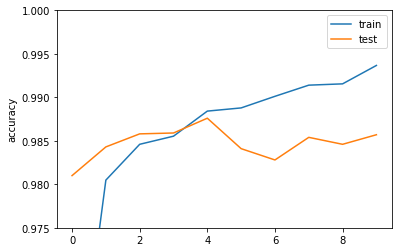

In [9]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(loc='best')
plt.ylabel('accuracy')
plt.ylim([0.975, 1])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                192       
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
1875/1875 [==============================] - 2s 838us/step - loss: 3.7311 - mse: 3.7311 - val_loss: 0.1950 - val_mse: 0.1950
Epoch 2/15
1875/1875 [=====================

(0.0, 0.1)

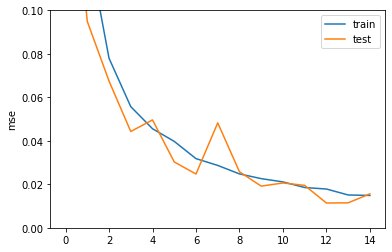

In [12]:
continuous = ['pickup_x', 'pickup_y', 'dropoff_x', 'dropoff_y', 'weight']
categorical = 'mnist_label'
layer_sizes = [32,32,32]
epochs = 15
    
x_train, y_train, x_test, y_test = models.preprocess_features(df, continuous=continuous, categorical=None)
mlp = models.create_mlp(num_features=x_train.shape[1], layer_sizes=layer_sizes, regress=True, summarize=True)

mlp.compile(optimizer="adam", loss="mse", metrics=["mse"])

history = mlp.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs,
          batch_size=32, verbose=True)

plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.legend(loc='best')
plt.ylabel('mse')
plt.ylim([0, .1])